In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
#import torch
import wplotlib

The original network was trained by basicRegression.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [4]:
net = wuml.load_torch_network('./basicRegressionNet.pk')
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
Ŷ = net(data)

Network Info:
	Learning rate: 0.001
	Max number of epochs: 500
	Cost Function: None
	Train Loop Callback: None
	Cuda Available: True
	Network Structure
		Linear(in_features=1, out_features=30, bias=True) , relu
		Linear(in_features=30, out_features=50, bias=True) , relu
		Linear(in_features=50, out_features=1, bias=True) , none


Check out our predictions

In [5]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
SR.true_vs_predict(print_out=True)

Mean Absolute Error: 0.6066

,y,ŷ,Δy
0,1.1,1.102,0.002
1,1.1,1.598,0.498
2,2.2,1.598,0.602
3,1.0,2.210,1.210
4,2.0,2.210,0.210
5,3.0,2.210,0.790
6,2.0,2.853,0.853
7,3.0,2.853,0.147
8,4.0,2.853,1.147


,y,ŷ,Δy
0,1.1,1.102,0.002
1,1.1,1.598,0.498
2,2.2,1.598,0.602
3,1.0,2.210,1.210
4,2.0,2.210,0.210
5,3.0,2.210,0.790
6,2.0,2.853,0.853
7,3.0,2.853,0.147
8,4.0,2.853,1.147


     y      ŷ     Δy
0  1.1  1.102  0.002
1  1.1  1.598  0.498
2  2.2  1.598  0.602
3  1.0  2.210  1.210
4  2.0  2.210  0.210
5  3.0  2.210  0.790
6  2.0  2.853  0.853
7  3.0  2.853  0.147
8  4.0  2.853  1.147

Draw the regression line

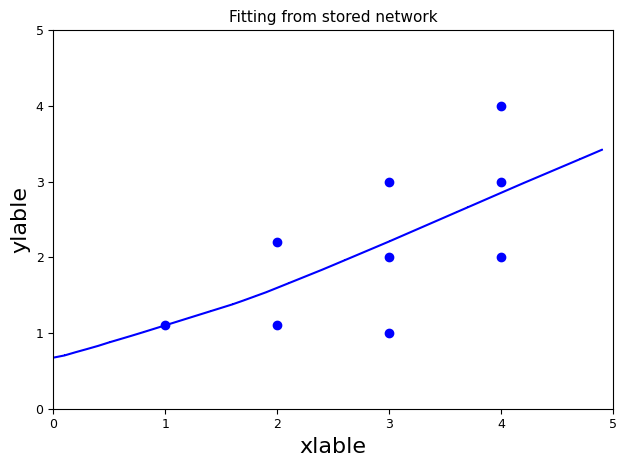

In [6]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = net(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='Fitting from stored network', xlim=[0,5], ylim=[0,5], show=True)	

   ---------------------------------------------------------

The original network was trained by complexNet.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [7]:
data = wuml.wData(xpath='../../data/wine.csv', ypath='../../data/wine_label.csv', 
					extra_data='../../data/wine_regress_label.csv', 
					preprocess_data='center and scale', 
					 batch_size=16, label_type='discrete')
Y2 = data.extra_data_dictionary['numpy'][0]

In [8]:
net = wuml.load_torch_network('./ComplexNet.pk')
[labels, ŷᵦ] = net(data)

All Networks
	Batch size: 32: 
	Learning rate: 0.001
	Max number of epochs: 10
	Cost Function: costFunction
	Cuda Available: True
	Networks 0 Structure
		Linear(in_features=13, out_features=100, bias=True) , relu
		Linear(in_features=100, out_features=3, bias=True) , none
	Networks 1 Structure
		Linear(in_features=3, out_features=50, bias=True) , relu
		Linear(in_features=50, out_features=1, bias=True) , none


output results

In [9]:
CR = wuml.summarize_classification_result(data.Y, labels)
SR = wuml.summarize_regression_result(Y2, ŷᵦ)
#    ---------------------------------------------------------

Mean Absolute Error: 7.1840

,y,ŷ,Δy
0,-0.97,3.357,4.327
1,-16.93,-10.771,6.157
2,13.65,3.849,9.800
3,4.96,5.889,0.928
4,25.40,13.636,11.769
...,...,...,...
173,35.46,26.797,8.665
174,21.14,20.019,1.124
175,13.59,20.208,6.616
176,3.00,16.492,13.492


The original network was trained by autoencoder.py<br>
here we load the trained network and use it<br>
   ---------------------------------------------------------

In [10]:
data = wuml.wData(xpath='../../data/wine.csv', ypath='../../data/wine_label.csv', 
					preprocess_data='center and scale', batch_size=128, label_type='discrete')

In [11]:
AE = wuml.load_torch_network('./autoencoder.pk')
#	This is the objective network output 
ẙ = AE.objective_network(data)

Autoencoder Info:
	Learning rate: 0.001
	Max number of epochs: 2000
	Cost Function: None
	Cuda Available: True
	Encoder Structure
		Linear(in_features=13, out_features=12, bias=True) , none
	Encoder Extra Output weight Structure
		Linear(in_features=12, out_features=3, bias=True) , none
	Encoder Structure
		Linear(in_features=12, out_features=13, bias=True) , none


Here we use the objective network output to perform LogisticRegression classification

In [12]:
cf = wuml.classification(ẙ, classifier='LogisticRegression')
wuml.jupyter_print(cf.result_summary(print_out=False))

,classifier,Train,Test
,LogisticRegression,1.0,1.0


   ---------------------------------------------------------